<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Análise de Risco de Crédito direcionada por Modelagem Matemática e Estatística
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este Notebook concentra código fonte da Tese de Bacharelado do curso de Engenharia de Controle e Automação da UNESP Sorocaba desenvolvido pelo aluno Leonardo Aderaldo Vargas.  </i> 
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

Amostra baseada na base de dados do Lending Club Loan Data : https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv/data

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Lending Club é uma empresa de empréstimos peer-to-peer com sede nos EUA. Eles combinam pessoas que desejam investir dinheiro com pessoas que desejam pedir dinheiro emprestado. Quando os investidores investem o seu dinheiro através do Lending Club, esse dinheiro é repassado aos mutuários e, quando os mutuários pagam os seus empréstimos, o capital mais os juros são repassados ​​aos investidores. É uma vitória para todos, pois podem obter taxas de empréstimo normalmente mais baixas e retornos mais elevados para os investidores.</i>
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>O conjunto de dados Lending Club contém dados completos de empréstimos para todos os empréstimos emitidos entre 2007-2015, incluindo a situação atual do empréstimo (atual, atrasado, totalmente pago, etc.) e as informações de pagamento mais recentes. Os recursos (também conhecidos como variáveis) incluem pontuação de crédito, número de consultas financeiras, endereço incluindo códigos postais e estado, e cobranças, entre outros. As cobranças indicam se o cliente perdeu um ou mais pagamentos e a equipe está tentando recuperar o dinheiro. O arquivo é uma amostra da base de dados exposta.</i>
</p>  





# <font color='red' style='font-size: 40px;'> Library   </font>
<hr style='border: 2px solid red;'>

In [1]:
# Importação das Bibliotecas e Parâmetros de Otimização
from functions import *
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# Spark Session
# from pyspark.sql import SparkSession, Row 
# #from pyspark.sql.functions import * as F
# import pyspark.sql.functions as F
# spark = SparkSession.builder.getOrCreate()

# <font color='red' style='font-size: 40px;'> 1. Pré-Processamento </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 1.1) Descrição da Base de Dados </font>
<hr style='border: 2px solid green;'>

### Variável Target (VALIDADO)

> 1. loan_status: Situação atual do empréstimo, sendo possível classificar o Cliente em Bom ou Ruim (IMPORTANTE)

### Variável ID (VALIDADO)

> 1. member_id: Id do solicitante (IMPORTANTE)


### Variáveis Referentes ao Produto (VALIDADO)

> 1. term: O número de pagamentos do empréstimo, podendo serem 36 parcelas ou 60 (IMPORTANTE)

> 2. grade: Grau de empréstimo atribuído (IMPORTANTE)

> 3. sub_grade: Subclasse de empréstimo atribuído (IMPORTANTE)

> 4. purpose: Categoria (MCC/CNAE por exemplo) fornecida pelo cliente para pegar o empréstimo (IMPORTANTE)

> 5. loan_amnt: Valor do empréstimo solicitado pelo mutuário; Se em algum momento o departamento de crédito reduzir do empréstimo, isso será refletido nesse valor (IMPORTANTE)

> 6. int_rate: Taxa de juros do empréstimo (IMPORTANTE)

> 7. issue_d: Data em que o empréstimo foi financiado (IMPORTANTE)

> 8. policy_code: Flag que indica Produto disponível publicamente ou não (IMPORTANTE)

> 9. pymnt_plan: Flag que indica se um plano de pagamento foi implementado para o empréstimo (IMPORTANTE)

> 10. initial_list_status: Status de listagem inicial do empréstimo. Os valores possíveis são W-F (IMPORTANTE)

> 11. installment: O pagamento mensal devido pelo mutuário se o empréstimo for originado. (Em termos simples, a originação de um empréstimo é o ponto de partida, onde o mutuário (a pessoa ou entidade que pede o empréstimo) solicita o empréstimo a um credor (a instituição financeira ou pessoa que empresta o dinheiro) e o credor avalia a solicitação, verifica a elegibilidade do mutuário e decide se concederá ou não o empréstimo.) (IMPORTANTE)

 ### Variáveis Referentes ao Cliente (VALIDADO)

 > 1. emp_title: O cargo fornecido pelo cliente ao solicitar o empréstimo (IMPORTANTE)

 > 2. emp_length: Duração do emprego que ele está em anos, sendo que 0 significa menos de 1 ano e 10 significa dez ou mais anos (IMPORTANTE)

 > 3. home_ownership: Flag que indica o Status da propriedade residencial do cliente ao solicitar o empréstimo, podenso ser aluguel, próprio, hipoteca, outros. (IMPORTANTE)

 > 4. verification_status: Flag que indica se a renda foi comprovada, não comprovada (IMPORTANTE)

 > 5. O número de incidências de inadimplência vencidas há mais de 30 dias no arquivo de crédito do mutuário nos últimos 2 anos (IMPORTANTE)

 > 6. annual_inc: Renda anual declarada pelo cliente (IMPORTANTE)

 > 7. addr_state: Estado do Cliente (IMPORTANTE)

 > 8. tot_cur_bal: Limite total considerando todos os produtos de crédito (IMPORTANTE)

 > 9. total_rev_hi_lim: Limite de rotativos total (IMPORTANTE)
 
 > 10. revol_bal: Limite de rotativos utilizado (IMPORTANTE)

 > 11. revol_util: Taxa de utilização de Limite de rotativos [revol_bal/total_rev_hi_lim] (IMPORTANTE)

 > 12. open_acc: Número de produtos de crédito atualmente contratados no histórico do cliente (IMPORTANTE)

 > 13. total_acc: Número total de produtos de crédito contratados no histórico do cliente (IMPORTANTE)

 > 14. pub_rec: Número de registros públicos depreciativos (IMPORTANTE)
 
 > 15. inq_last_6mths: Número de consultas nos últimos 6 meses (excluindo consultas sobre automóveis e hipotecas) (IMPORTANTE)

 > 16. earliest_cr_line: Data em que o primeiro produto de crédito foi contratado pelo cliente (IMPORTANTE)

 > 17. mths_since_last_record: Número de meses desde o último registro público (IMPORTANTE)

 > 18. mths_since_last_major_derog: Meses desde a classificação mais recente de 90 dias ou menos (IMPORTANTE)

 > 19. mths_since_last_delinq: O número de meses desde a última inadimplência do mutuário (IMPORTANTE)


In [2]:
df = pd.read_parquet('data/credit_risk_loan_data.parquet').drop(['id', 'url'], axis = 1)

# <font color='green' style='font-size: 30px;'> 1.2) Definição da Target </font>
<hr style='border: 2px solid green;'>

> 1. A priori, deve-se definir de maneira clara as situações consideradas como Default. Definiu-se um cliente ruim como aquele o qual está em:

- Processo de cobraça ('Charged Off')
- Inadimplente ('Default')
- Atrasado (31 dias ou mais)
- Critérios Mínimos de Aprovação - CMA ('Does not meet the credit policy. Status:Charged Off')
- Possui 1 ou mais contas em inadimplência

> 2. A partir desta definição, deve-se criar a Target mostrando exatamente o que é um cliente Bom ou Ruim 

> 3. Escolheu-se o número "0" para representar o cliente Bom e o número "1" para representar o cliente Ruim, pois o evento de interesse é definir principalmente quem são os Maus Pagadores a fim de evitar ao máximo a inadimplêmcia

> 4. Nota-se que em torno de 88.74% dos clientes são adimplentes, ao passo que 11.26% tornou-se inadimplente

> 5. Esta situação caracteriza um problema de classes desbalanceadas, portanto, isso deve-se ser levado em consideração durante o processo de modelagem e aplicar técnicas para lidar com este tipo de caso

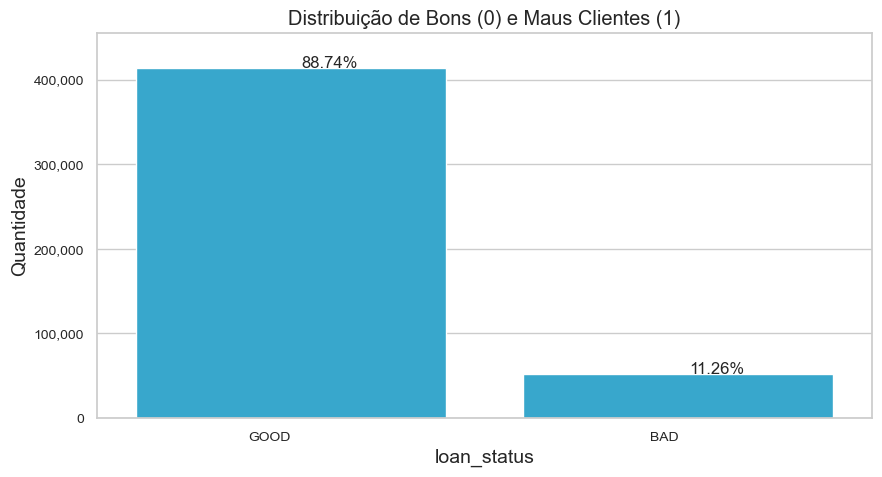

In [3]:
df['loan_status'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']) | df['acc_now_delinq'].fillna(0) != 0, 'BAD', 'GOOD') 
plota_barras(['loan_status'], False, df, 1, 1, 'Distribuição de Bons (0) e Maus Clientes (1)', 0)
df['loan_status'] = np.where(df['loan_status'] == 'BAD', 1, 0)

# <font color='green' style='font-size: 30px;'> 1.3) Separação em Treino e Teste </font>
<hr style='border: 2px solid green;'>

> 1. Antes de realizar qualquer análise ou modelagem, deve-se separar em Treino e Teste a fim de simular um ambiente real

> 2. Ao separar antes de qualquer alteração, evita-se um erro muito grave denominado Data leakage

> 3. As análises serão realizadas unicamente sobre a base de Treinamento, simulando um ambiente real no qual a priori a base de Teste seria inexistente 

In [4]:
df_train = separa_treino_teste('loan_status', df, 0.20)[0]
df_test = separa_treino_teste('loan_status', df, 0.20)[1]

print(f'Quantidade de Dados Utilizados para Treinamento: {df_train.shape[0]}')
print(f'Quantidade de Dados Utilizados para Teste: {df_test.shape[0]}')

Quantidade de Dados Utilizados para Treinamento: 373028
Quantidade de Dados Utilizados para Teste: 93257


# <font color='green' style='font-size: 30px;'> 1.4) Variáveis de Entrada </font>
<hr style='border: 2px solid green;'>

> 1. Após a análise de variáveis de Produtos e Clientes, definiu-se quais serão utilizadas como entrada do modelo 

In [5]:
columns_selected = ['loan_status','member_id','term','grade','sub_grade','purpose', 'delinq_2yrs', 'loan_amnt','int_rate','issue_d','policy_code','pymnt_plan','initial_list_status','installment','emp_title','emp_length','home_ownership',
'verification_status','annual_inc','addr_state', 'zip_code','tot_cur_bal','total_rev_hi_lim','revol_bal','revol_util','open_acc','total_acc','pub_rec','inq_last_6mths','earliest_cr_line','mths_since_last_record',
'mths_since_last_major_derog',
'mths_since_last_delinq']

df_train = df_train[columns_selected]
df_test = df_test[columns_selected]
print(f'Existem {len(columns_selected)} variáveis excluindo as que são referentes a Pagamento ou variáveis totalmente irrelevantes no Dataset')

Existem 33 variáveis excluindo as que são referentes a Pagamento ou variáveis totalmente irrelevantes no Dataset


# <font color='red' style='font-size: 40px;'> 2. Engenharia de Atributos </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 2.1) Anos no emprego atual</font>
<hr style='border: 2px solid green;'>

In [6]:
def numero_de_anos_emprego_atual(df):
    df['emp_length'] = (df['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9,'10+ years':10}).fillna(0))
    df['emp_length'] = df['emp_length'].apply(lambda x:int(x))
    df['emp_length'] = np.where(df['emp_length'] <= 3, '3_YEARS', 
                        np.where(df['emp_length'] <= 6, '6_YEARS',
                        np.where(df['emp_length'] <= 9, '9_YEARS',
                        '10_YEARS+')))
    return df['emp_length']

df_train['emp_length'] = numero_de_anos_emprego_atual(df_train)

# <font color='green' style='font-size: 30px;'> 2.2) Número de Registros Negativos</font>
<hr style='border: 2px solid green;'>

In [7]:
def numero_de_registros_negativos(df):

    df = df_train[['loan_status', 'pub_rec']].copy()
    df[['pub_rec']] = np.where(df[['pub_rec']] == 0, 'sem_registros_negativos', 'com_registros_negativos')

    return df['pub_rec']

df_train['pub_rec'] = numero_de_registros_negativos(df_train)

# <font color='green' style='font-size: 30px;'> 2.3) Consulta de Crédito nos Últimos 6 meses</font>
<hr style='border: 2px solid green;'>

In [8]:
def consulta_de_credito_nos_ultimos_6_meses(df):
    df = df_train[['loan_status', 'inq_last_6mths']].copy()
    df[['inq_last_6mths']] = np.where(df[['inq_last_6mths']] == 0, 'sem_consultas', 'com_consultas')

    return df['inq_last_6mths']

df_train['inq_last_6mths'] = consulta_de_credito_nos_ultimos_6_meses(df_train)

# <font color='green' style='font-size: 30px;'> 2.4) Comprometimento de Renda</font>
<hr style='border: 2px solid green;'>

In [9]:
def compromento_de_renda(df): 
    df_aux = df_train[['annual_inc', 'installment', 'loan_amnt', 'term', 'int_rate', 'loan_status']].copy()
    df_aux['term'] = np.where(df_aux['term'] == ' 36 months', 3, 5)
    df_aux['loan_amnt_with_int_rate'] = calcula_juros_compostos(df_aux['loan_amnt'], df_aux['int_rate'], df_aux['term'])
    df_aux['annual_payment'] = df_aux['loan_amnt_with_int_rate']/df_aux['term']
    df_aux['annual_income_commitment_rate'] = ((df_aux['annual_payment']/df_aux['annual_inc'])*100).round(2)
    
    return df_aux['annual_income_commitment_rate']

df_train['annual_income_commitment_rate'] = compromento_de_renda(df_train)

# <font color='green' style='font-size: 30px;'> 2.5) Número de meses desde a contratação do produto de crédito atual</font>
<hr style='border: 2px solid green;'>

In [10]:
def n_meses_produto_credito_atual(df):
    df = df.copy()
    df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
    df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df['issue_d'])/np.timedelta64(1, 'M')))
    df['mths_since_issue_d'] = df['mths_since_issue_d'].fillna(df['mths_since_issue_d'].median())
    df['mths_since_issue_d'] = np.where(df['mths_since_issue_d'] < 0, df['mths_since_issue_d'].median(), df['mths_since_issue_d'])
    df['mths_since_issue_d'] = df['mths_since_issue_d'].apply(lambda x:int(x))
    df['issue_d'] = df['mths_since_issue_d']

    return df['issue_d']

df_train['issue_d'] = n_meses_produto_credito_atual(df_train)

# <font color='green' style='font-size: 30px;'> 2.6) Número de meses desde a contratação do primeiro produto de crédito</font>
<hr style='border: 2px solid green;'>

In [11]:
def n_meses_primeiro_produto_credito(df):
    df = df.copy()
    df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
    df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df['earliest_cr_line'])/np.timedelta64(1, 'M')))
    df['mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].fillna(df['mths_since_earliest_cr_line'].median())
    df['mths_since_earliest_cr_line'] = np.where(df['mths_since_earliest_cr_line'] < 0, df['mths_since_earliest_cr_line'].median(), df['mths_since_earliest_cr_line'])
    df['mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].apply(lambda x:int(x))
    df['earliest_cr_line'] = df['mths_since_earliest_cr_line']
    
    return df['earliest_cr_line']

df_train['earliest_cr_line'] = n_meses_primeiro_produto_credito(df_train)

# <font color='green' style='font-size: 30px;'> 2.7) Features Estatísticas</font>
<hr style='border: 2px solid green;'>

In [12]:
def taxa_de_bad_por_categoria(df, categorica):
    df_aux = df[[f'{categorica}', 'loan_status']].copy()
    good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 0].groupby(f'{categorica}', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
    bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 1].groupby(f'{categorica}', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
    df_aux = good.merge(bad, on = f'{categorica}', how = 'left')
    df_aux['qt_total'] = df_aux['qt_good'] + df_aux['qt_bad']
    df_aux[f'bad_rate_{categorica}'] = ((df_aux['qt_bad']/df_aux['qt_total'])*100).round(2)
    df_aux_2 = df.merge(df_aux[[f'{categorica}', f'bad_rate_{categorica}']], on = f'{categorica}', how = 'left')

    return df_aux_2[f'bad_rate_{categorica}']

def itera_sobre_as_categoricas_bad(df):
    df_aux = df.copy()
    categoricas = ['term', 'grade', 'sub_grade', 'purpose', 'initial_list_status', 'emp_length', 'verification_status', 'pub_rec', 'inq_last_6mths']
    for cat in categoricas:
        df_aux[f'bad_rate_{cat}'] = taxa_de_bad_por_categoria(df, cat)

    return df_aux

df_train = itera_sobre_as_categoricas_bad(df_train)

In [13]:
def media_categoria_variavel_quantitativa(df, categorica, quantitativa):
    df_aux = df[[f'{categorica}', f'{quantitativa}']].copy()
    df_aux = pd.DataFrame(df_aux.groupby(f'{categorica}', as_index = False)[f'{quantitativa}'].mean()).rename({f'{quantitativa}':f'{categorica}_{quantitativa}_mean'}, axis = 1)
    df_aux_2 = df.merge(df_aux[[f'{categorica}', f'{categorica}_{quantitativa}_mean']], on = f'{categorica}', how = 'left')

    return df_aux_2[f'{categorica}_{quantitativa}_mean']

def itera_sobre_as_categoricas(df):
    df_aux = df.copy()
    categoricas = ['term', 'grade', 'sub_grade', 'purpose', 'initial_list_status', 'emp_length', 'verification_status', 'pub_rec', 'inq_last_6mths']
    quantitativas = ['loan_amnt', 'int_rate', 'annual_inc', 'annual_income_commitment_rate', 'tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'open_acc', 'total_acc']
    for cat in categoricas:
        for quant in quantitativas:
            df_aux[f'{cat}_{quant}_mean'] = media_categoria_variavel_quantitativa(df, cat, quant)
    
    return df_aux

df_train = itera_sobre_as_categoricas(df_train)


# <font color='red' style='font-size: 40px;'> 3. Feature Selection </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 3.1) Verificação de Variáveis Nulas ou Irrelevantes </font>
<hr style='border: 2px solid green;'>

> 1. Excluiu-se as variáveis que possuem 100% dos registros nulos

> 2. Excluiu-se também as variáveis que falam a respeito de questões de Pagamento, pois esse fenômeno é após a concessão do crédito e, como um modelo de PD serve para decidir quem pode ou não receber tal concessão, seria errado incluir variáveis de pagamento nas análises ou na modelagem


In [14]:
df_nulls = pd.DataFrame(df_train.isnull().sum()).reset_index().rename({0:'nulls_amnt'}, axis = 1)
df_nulls['nulls_rate'] = df_nulls['nulls_amnt']/df_train.shape[0]
print(f'Existem {len(df_nulls)} variáveis no Dataset')
df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
columns_not_nulls = list(df_not_nulls_nulls['index'])
print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')


Existem 124 variáveis no Dataset
Existem 22 variáveis sem registros nulos no Dataset


# <font color='green' style='font-size: 30px;'> 3.2) Verificação de Variáveis Contínuas, Discretas e Categóricas </font>
<hr style='border: 2px solid green;'>

> 1. Para facilitar a Análise Exploratória, segmentou-se as variáveis em Qualitativas, Discretas e Contínuas.

> 2. Definiu-se essas classificações a fim de aplicar técnicas estatatísticas corretas para analisá-las

> 3. Essa abordagem é importante pois cada tipo de variável tem determinado jeito de ser analisada. 

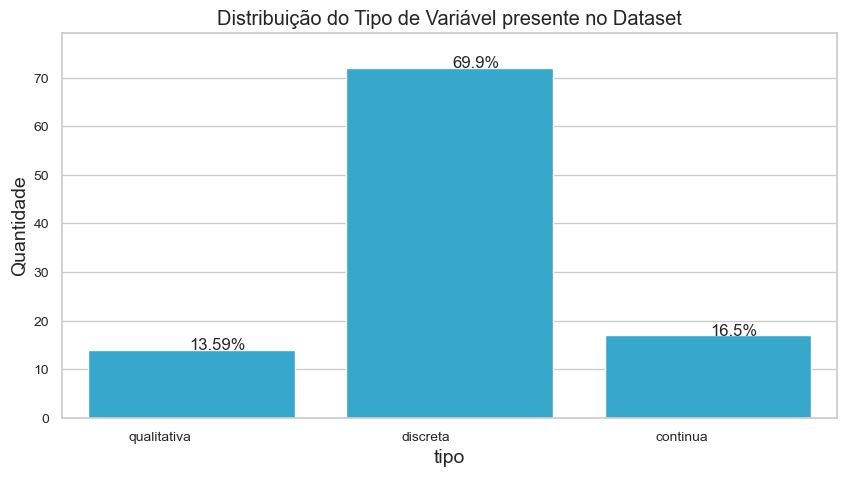

In [15]:
variaveis = verifica_tipo_variavel(df_train)
plota_barras(['tipo'], False, variaveis, 1, 1, 'Distribuição do Tipo de Variável presente no Dataset', 0)

# <font color='red' style='font-size: 40px;'> 4. Modelagem Inicial  </font>
<hr style='border: 2px solid red;'>

In [16]:
df_train = df_train[remove_features_baixa_variancia('loan_status', df_train, 1)]
print(df_train.shape)

ValueError: could not convert string to float: ' 36 months'

In [ ]:
df_train = df_train[remove_features_mutual_information('TARGET', df_train, 0)[1]]
print(df_train.shape)

In [ ]:
df_train = df_train[remove_features_feature_importance('TARGET', df_train, 10, 0.01)]
print(df_train.shape)

# <font color='red' style='font-size: 40px;'> 5. Otimização do Modelo Escolhido </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 6. Criação da Política de Crédito para Baseline</font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 7. Tradução e Quantificação dos Resultados</font>
<hr style='border: 2px solid red;'>